<a id="NEtop"></a>

# Numerical Experiments
examples of optimizing system with different configurations, such as bounds, regularization functions, objective functions, etc.

the general flow or numerical experiments: 
* initialize and experiment object
* setup the specific configurations that you need for this particular experiement
* run()
* visualize the results, and discuss in text what's going on

## Index:

* [hand tuned evaluations](#hand_tuned_evaluations)
* [solution without constraints or penalties](#no_constraints_or_penalties)
* [BFGS](#BFGS_opt)




## import classes

In [152]:
#import all models, visualizers, and optimizers with a run line magic 
%run models.ipynb


models run as library
optimizers run as library


<a id="hand_tuned_evaluations"></a>
# Hand tuned evaluations [ &#x21ea;](#NEtop)

### hip knee robot (meghs's robot)

In [102]:
hkRobot = Exp()       #init robot
#hand tune robot configuration
hkRobot.r.xl = 0
hkRobot.r.yl = 0
hkRobot.r.xr = 0
hkRobot.r.yr = 0 

hkRobot.r.L1l = .4 
hkRobot.r.L2l = .1 
hkRobot.r.L3l = .288
hkRobot.r.L1r = .1
hkRobot.r.L2r = .4
hkRobot.r.θ3l = 0

hkRobot.r.e3  = 'down'

#configure xBest to be this
hkRobot.xBest = [hkRobot.r.get_x()]
hkRobot.initialize()
hkRobot.vis.display("tb")


    'data': [{'line': {'color': 'gray'},
              'name': 'placeholder',
  …

In [101]:
#make a point 
hkRobot.scoreMode = 'inscribed'

### original proposal robot

In [97]:
propRobot = Exp()    #init robot

#hand tune robot bounds
propRobot.r.xl_max =  1.5
propRobot.r.yl_min = -1.5
propRobot.r.xr_max =  1.5
propRobot.r.yr_min = -1.5 
propRobot.r.L3l_min = 0.001

# #hand tune robot configuration
propRobot.r.xl =  .6
propRobot.r.yl = -.75
propRobot.r.xr =  .75
propRobot.r.yr = -.75

propRobot.r.L3l = 0
propRobot.r.θ3l = 0

propRobot.r.e3  = 'down'

#configure xBest to be this
propRobot.xBest = [propRobot.r.get_x()]
propRobot.initialize()
propRobot.vis.display("tb")


    'data': [{'line': {'color': 'gray'},
              'name': 'placeholder',
  …

<a id="no_constraints_or_penalties"></a>
# Solution without constraints or penalties [ &#x21ea;](#NEtop)



In [99]:
#run simulated anealing for a long time. 
exp1 = Exp()

#configure experiment
exp1.optimizer.nIter = 100000
exp1.initialize()

#run (took several hours)
#exp1.run()

#save
# cm = "100k SA optimization, segments are long but have a high match over a large segment of space"
# exp1.save(cm)

#load from storage
exp1.load('fes')

#display
exp1.vis.display("tb")

    'data': [{'line': {'color': 'gray'},
              'name': 'placeholder',
  …

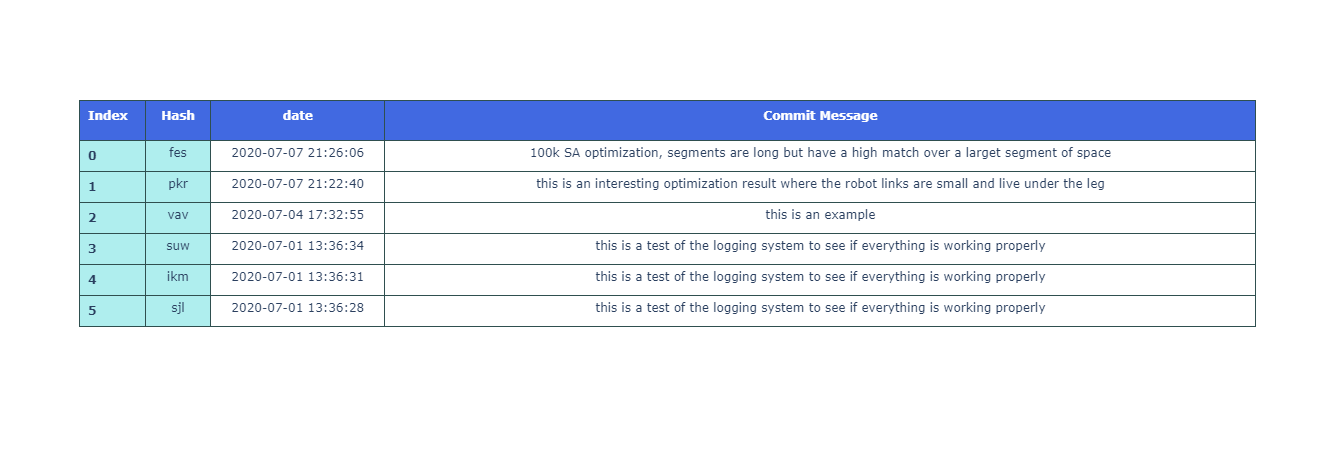

In [68]:
Exp.Log()

# load compact solution and visualize it

In [42]:
#run simulated anealing for a long time. 
exp2 = Exp()

#laod
a = exp2.load('pkr')

#display
exp2.vis.display("tb")

    'data': [{'line': {'color': 'gray'},
              'name': 'placeholder',
  …

<a id="BFGS_opt"></a>
# BFGS optimization - optimize around hand tuned robot [ &#x21ea;](#NEtop)

In [153]:
# hkRobot = Exp()       #init robot

# #hand tune robot configuration
# hkRobot.r.xl = 0
# hkRobot.r.yl = 0
# hkRobot.r.xr = 0
# hkRobot.r.yr = 0 

# hkRobot.r.L1l = .4 
# hkRobot.r.L2l = .1 
# hkRobot.r.L3l = .288
# hkRobot.r.L1r = .1
# hkRobot.r.L2r = .4
# hkRobot.r.θ3l = 0

# hkRobot.r.e3  = 'down'

# #setup the optimizer and x0
# hkRobot.optimizer = BFGS()
# hkRobot.optimizer.x0 = [hkRobot.r.get_x()]

# #run optimization
# exp.run()

# #display optimization
# exp.vis.display("tb")


         Current function value: -42.260518
         Iterations: 6
         Function evaluations: 1524
         Gradient evaluations: 126


    'data': [{'line': {'color': 'gray'},
              'name': 'placeholder',
  …

In [149]:
# exp = Exp()

# #setup the optimizer
# exp.optimizer = BFGS()
# exp.optimizer.x0 = [exp.r.get_x()]

# #run optimization
# exp.run()

# #display optimization
# exp.vis.display("tb")

         Current function value: -42.260518
         Iterations: 6
         Function evaluations: 1524
         Gradient evaluations: 126


    'data': [{'line': {'color': 'gray'},
              'name': 'placeholder',
  …